In [1]:
from definitions.riclpm_funcs import read_res_riclpm
import pandas as pd 
import numpy as np
import pyreadr

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

In [ ]:
# res = pyreadr.read_r('/Users/Serena/Desktop/panel_network/comorb-longit-project/src/assets/results/mod1/ri_pfree_transf/mDEP_BMI.RData')

# Descriptives 

In [9]:
fitm, esti, cors, summ = read_res_riclpm('sDEP','HDL_chol','free')

In [10]:
print(esti.loc[esti.label.str.contains('CL_dep'), ['est','se']].mean().round(3))

esti.loc[esti.label.str.contains('CL_dep')].round(3)

est    0.062
se     0.125
dtype: float64


,lhs,op,rhs,label,est,se,z,pvalue,ci.lower,ci.upper,u_est,u_ci.lower,u_ci.upper,u_pvalue,sign
17,w_dep2,~,w_cmr1,CL_dep1,0.022,0.065,0.698,0.490,-0.041,0.085,0.045,-0.082,0.173,0.485,0
36,w_dep3,~,w_cmr2,CL_dep2,0.018,0.044,0.706,0.473,-0.032,0.068,0.031,-0.055,0.117,0.480,0
40,w_dep4,~,w_cmr3,CL_dep3,0.144,0.266,2.125,0.008,0.038,0.251,0.566,0.044,1.088,0.034,1


In [11]:
print(esti.loc[esti.label.str.contains('CL_cmr'), ['est','se']].mean().round(3))

esti.loc[esti.label.str.contains('CL_cmr')].round(3)

est    0.072
se     0.012
dtype: float64


,lhs,op,rhs,label,est,se,z,pvalue,ci.lower,ci.upper,u_est,u_ci.lower,u_ci.upper,u_pvalue,sign
19,w_cmr2,~,w_dep1,CL_cmr1,0.009,0.015,0.417,0.679,-0.033,0.051,0.006,-0.022,0.035,0.677,0
38,w_cmr3,~,w_dep2,CL_cmr2,0.148,0.009,4.179,0.000,0.066,0.230,0.038,0.020,0.056,0.000,1
42,w_cmr4,~,w_dep3,CL_cmr3,0.059,0.011,1.506,0.186,-0.028,0.146,0.017,-0.005,0.039,0.132,0


In [7]:
# fitm.T.round(3)

In [ ]:
# pd.set_option('display.max_rows', 500)
# esti.round(3)

In [3]:
esti.iloc[47:49].round(3)

,lhs,op,rhs,label,est,se,z,pvalue,ci.lower,ci.upper,u_est,u_ci.lower,u_ci.upper,u_pvalue,sign
47,ri_dep,~~,ri_dep,,1.0,0.000,26.837,NaN,1.0,1.0,0.012,0.011,0.013,0.0,1
48,ri_cmr,~~,ri_cmr,,1.0,0.001,20.573,NaN,1.0,1.0,0.012,0.010,0.013,0.0,1


In [8]:
esti.iloc[34:35].round(3)

,lhs,op,rhs,label,est,se,z,pvalue,ci.lower,ci.upper,u_est,u_ci.lower,u_ci.upper,u_pvalue,sign
34,ri_dep,~~,ri_cmr,covRI,0.109,0.0,4.359,0.0,0.061,0.157,0.001,0.001,0.002,0.0,1


In [9]:
esti.loc[esti.label.str.contains('co')].round(3)

,lhs,op,rhs,label,est,se,z,pvalue,ci.lower,ci.upper,u_est,u_ci.lower,u_ci.upper,u_pvalue,sign
28,w_dep1,~~,w_cmr1,cor1,-0.075,0.0,-3.937,0.000,-0.113,-0.038,-0.002,-0.002,-0.001,0.000,1
29,w_dep2,~~,w_cmr2,cor2,0.018,0.0,0.821,0.412,-0.025,0.060,0.000,-0.000,0.001,0.412,0
30,w_dep3,~~,w_cmr3,cor3,0.095,0.0,5.874,0.000,0.063,0.126,0.002,0.001,0.002,0.000,1
31,w_dep4,~~,w_cmr4,cor4,0.106,0.0,5.755,0.000,0.070,0.141,0.002,0.001,0.002,0.000,1
32,w_dep5,~~,w_cmr5,cor5,-0.027,0.0,-1.382,0.165,-0.064,0.011,-0.000,-0.001,0.000,0.167,0
33,w_dep6,~~,w_cmr6,cor6,0.117,0.0,3.021,0.004,0.038,0.197,0.001,0.000,0.002,0.003,1
34,ri_dep,~~,ri_cmr,covRI,0.109,0.0,4.359,0.000,0.061,0.157,0.001,0.001,0.002,0.000,1


In [26]:
fitm, esti, summ, _ = read_res_riclpm('sDEP', 'FMI', 'free')

In [29]:
summ.columns[summ.columns.str.contains('DEP')]

Index(['sDEP_score_10.6y', 'sDEP_score_12.8y', 'sDEP_score_13.8y',
       'sDEP_score_16.6y', 'sDEP_score_17.8y', 'sDEP_score_23.8y'],
      dtype='object')

In [34]:
pd.options.mode.chained_assignment = None # avoid SettingWithCopyWarning

def get_results(name, dep='sDEP', cmr='FMI'):

    fitm, esti, summ, _ = read_res_riclpm(dep, cmr, 'free')

    td = [float(i.split('_')[-1][:-1]) for i in summ.columns[summ.columns.str.contains(dep)]]
    tf = [float(i.split('_')[-1][:-1]) for i in summ.columns[summ.columns.str.contains(cmr)]]

    (t1, t2) = (tf, td) if name.__contains__('dep') else (td, tf)  # ONLY for CL terms
    
    diff = np.subtract(t2[1:], t1[:-1])
    # print(d)
    
    es = esti.loc[esti.label.str.contains(name)]

    es['est2'] = [f'{e} [{l}; {u}]' for e,l,u in zip((es['est']).round(2).map(str),
                                                    (es['ci.lower']).round(2).map(str),
                                                    (es['ci.upper']).round(2).map(str)
                                                   )]
    
    es['age'] = [f'{i} --> {j}' for i,j in zip(t1[:-1], t2[1:]) ]
    es['time'] = diff.round(1)
    es['yest'] = [f'{e} [{l}; {u}]' for e,l,u in zip((es['est'] / diff).round(2).map(str),
                                                    (es['ci.lower'] / diff).round(2).map(str),
                                                    (es['ci.upper'] / diff).round(2).map(str)
                                                   )]
    out = es[['est2','age','time','yest']]
    out.insert(0, 'term', name)
    out.insert(0, 'cmr', cmr)
    
    print(cmr,name, ' - estim:', np.mean(es.est / diff).round(3))
    print(cmr,name, ' - se:',np.mean(es.se).round(3))
    
    return(out)

out_list = []

for cmr in ['LMI','BMI','android_fatmass','waist_circ','HDL_chol','LDL_chol','insulin','triglyc','CRP']:
    for term in ['CL_dep','CL_cmr']:
        d = get_results(name=term, dep='sDEP', cmr=cmr)
        out_list.append(d)
    
# see pd.concat documentation for more info
out_table = pd.concat(out_list)
# write DataFrame to an excel sheet 
out_table.to_csv('~/Desktop/table3.csv')

# pd.concat([
#     get_results(td,td,'AR_dep'),
#     get_results(tf,tf,'AR_cmr'),
#     get_results(tf,td,'CL_dep'),
#     get_results(td,tf,'CL_cmr')
# ]).to_csv('~/Desktop/try.csv')

LMI CL_dep  - estim: -0.025
LMI CL_dep  - se: 0.029
LMI CL_cmr  - estim: -0.027
LMI CL_cmr  - se: 0.007
BMI CL_dep  - estim: 0.024
BMI CL_dep  - se: 0.035
BMI CL_cmr  - estim: 0.002
BMI CL_cmr  - se: 0.008
android_fatmass CL_dep  - estim: 0.027
android_fatmass CL_dep  - se: 0.054
android_fatmass CL_cmr  - estim: 0.011
android_fatmass CL_cmr  - se: 0.014
waist_circ CL_dep  - estim: 0.01
waist_circ CL_dep  - se: 0.067
waist_circ CL_cmr  - estim: -0.002
waist_circ CL_cmr  - se: 0.011
HDL_chol CL_dep  - estim: 0.012
HDL_chol CL_dep  - se: 0.125
HDL_chol CL_cmr  - estim: 0.045
HDL_chol CL_cmr  - se: 0.012
LDL_chol CL_dep  - estim: 0.008
LDL_chol CL_dep  - se: 0.121
LDL_chol CL_cmr  - estim: 0.023
LDL_chol CL_cmr  - se: 0.01
insulin CL_dep  - estim: 0.006
insulin CL_dep  - se: 0.059
insulin CL_cmr  - estim: 0.007
insulin CL_cmr  - se: 0.013
triglyc CL_dep  - estim: 0.002
triglyc CL_dep  - se: 0.064
triglyc CL_cmr  - estim: 0.017
triglyc CL_cmr  - se: 0.013
CRP CL_dep  - estim: -0.002
CRP CL_

In [27]:
# esti.loc[esti.label.str.contains('CL_cmr')].round(3)

# Plots

In [28]:
figwidth=20
fs_sm=10

## FIGURE 1

In [29]:
def boxplot(ax, var, name, f1=fs_sm): 
    subs = summ.loc[:, summ.columns.str.contains(var)]
    times = [float(i.split('_')[-1][:-1]) for i in subs.columns]

    stats = [{"med": med, "q1": q1, "q3": q3, "whislo": min, "whishi": max} for med, q1, q3, min, max in zip(
        subs.loc["Median"], subs.loc["1st Qu."], subs.loc["3rd Qu."], subs.loc["Min."], subs.loc["Max."]
    )]
    
    # bg_color = # 'silver'
    bg_color, md_color = ('#F2D7D5','#7B241C') if var == 'FMI' else ('#D4E6F1','#1A5276') # red and bluish
    
    bxp = ax.bxp(stats, positions=times, showfliers=False, patch_artist=True,
                 medianprops=dict(color=md_color, linewidth=2.5),
                 boxprops=dict(color=bg_color, linewidth=3.5),
                 whiskerprops=dict(color=bg_color, linewidth=1.5),
                 capprops=dict(color=bg_color, linewidth=1.5), zorder=10);

    ax.set(xlim=(9,26), ylim=(-0.5,30.5))
    ax.set_ylabel(name, fontsize=f1, fontweight='bold')

    # Add group "cross-sectional" time points using grey background
    cp_color = '#F2F4F4' # light grey
    
    crosspoints = [[9.4,11],[11.4,13.2],[13.4,14.2],[15,17],[17.4,18.2],[23.4,24.9]]

    [ax.axvspan(x1, x2, color=cp_color, zorder=0) for x1,x2 in crosspoints]
    [ax.text(x1+0.1, 27.8, str(i+1), color='grey', fontsize=f1, zorder=1) for i, (x1,x2) in enumerate(crosspoints)]
    
    return(bxp)

In [30]:
def corrplot(ax, f1=fs_sm):
    mask = np.zeros_like(cors)
    mask[np.triu_indices_from(mask)] = True

    labels = ['Dep'+str(x) for x in range(1,7)] + ['FMI'+str(x) for x in range(1,7)]
    
    with sns.axes_style("white"):
        c = sns.heatmap(cors, ax=ax, mask=mask, annot=True, fmt=".2f", annot_kws={"size": f1}, vmin=-1, vmax=1, linewidth=.5, square=True, 
                        cmap=sns.diverging_palette(300, 145, s=60, as_cmap=True))
        c.set_yticklabels(labels, fontsize=f1, rotation=0)
        c.set_xticklabels(labels, fontsize=f1, rotation=0)
        
    return(c)

/var/folders/f9/fknlq25n23l74zmhg8zbckx80000gn/T/ipykernel_15929/2182833356.py:12: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  bxp = ax.bxp(stats, positions=times, showfliers=False, patch_artist=True,
/var/folders/f9/fknlq25n23l74zmhg8zbckx80000gn/T/ipykernel_15929/2182833356.py:12: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  bxp = ax.bxp(stats, positions=times, showfliers=False, patch_artist=True,


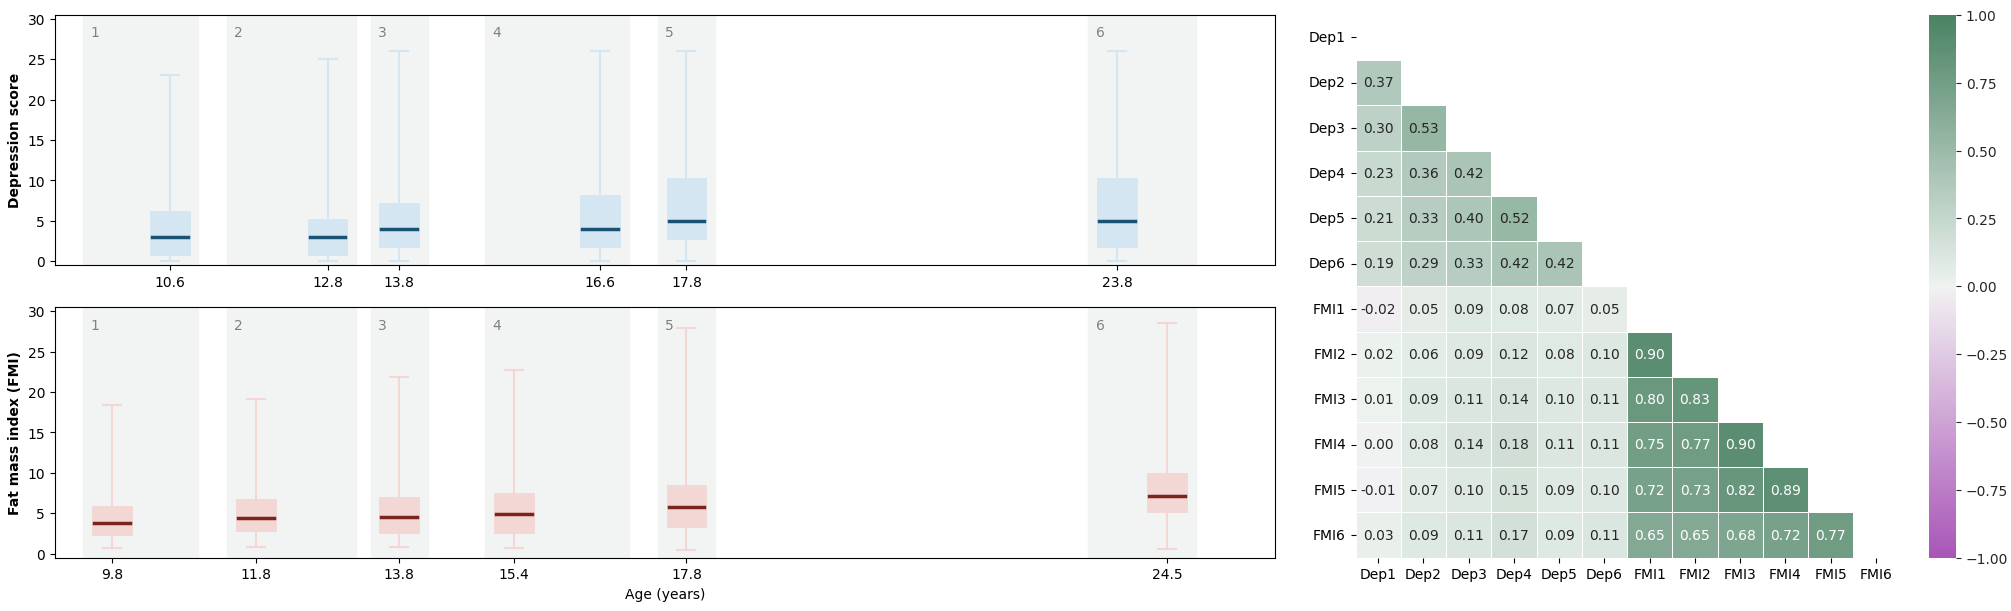

In [31]:
fig, axs = plt.subplot_mosaic('aac;bbc', figsize=(figwidth, 6),
                              layout='constrained');

boxplot(axs['a'], 'sDEP', 'Depression score',);
boxplot(axs['b'], 'FMI', 'Fat mass index (FMI)');
axs['b'].set_xlabel('Age (years)', fontsize=fs_sm);

corrplot(axs['c']);

# fig.fig_title('F1. Descriptive statistics for main outcomes', fontsize=12, fontweight='bold')


## FIGURE 2

In [32]:
def resplot(ax, t1, t2, name, color, label, ylims, posx = 23.5):

    es = esti.loc[esti.label.str.contains(name)].reset_index()

    for e in es.index:
        if es.loc[e, 'ci.lower'] > 0: 
            lw = 2
            ls = '-'
        else:
            lw = 1
            ls = '--'
        ax.hlines(y=es.loc[e, 'est'], xmin=t1[e], xmax=t2[e+1], color=color, linewidth=lw, linestyle=ls)
        ax.scatter(y=[es.loc[e, 'est']]*2, x=[t1[e],t2[e+1]], color=color, s=30, marker='|')
        ax.fill_between([t1[e], t2[e+1]], es.loc[e, 'ci.lower'], es.loc[e, 'ci.upper'], color=color, alpha=.1)

    
    ax.set(xlim=(9,26), ylim=ylims, xticks=np.arange(10,27))
    
    ax.axhline(y=0, linewidth=1, linestyle='--', color = 'grey')

    ax.set_ylabel('β estimate', fontsize=15);
    ax.set_xlabel('Age (years)', fontsize=15);


    # add legend
    space = (abs(ylims[0])+ylims[1])*.10
    posy = ylims[1] - space
    if 'dep' in name:
        posy = posy - space
    
    ax.hlines(y=posy, xmin=posx, xmax=posx+0.4, color=color, label=name,linewidth=2)
    ax.fill_between([posx, posx+0.4], posy+space/2.5, posy-space/2.5, color=color, alpha=.1)
    ax.text(posx+0.6, posy, label, color='k', fontsize=15, va='center', fontweight='bold')

    ax.grid(axis='both', linewidth=0.2, linestyle='-', color='grey') 


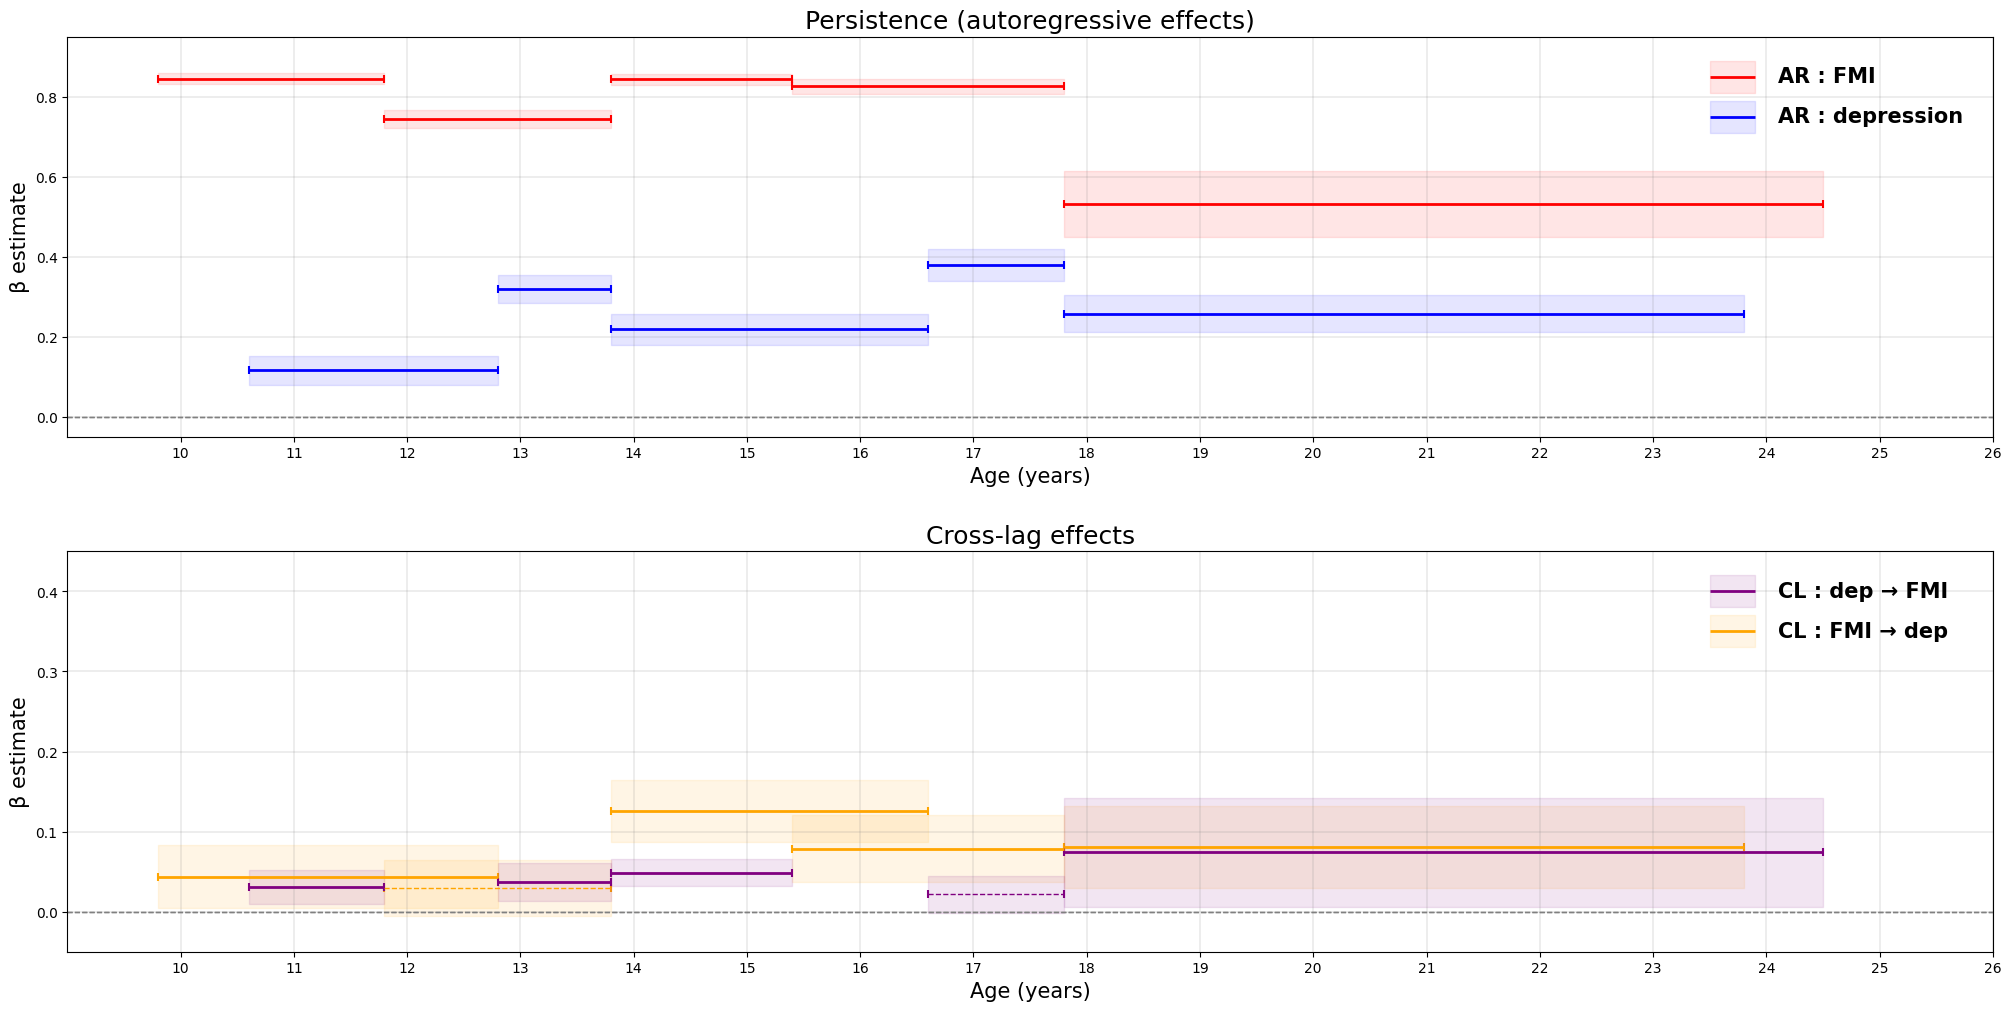

In [33]:
# fig, axs = plt.subplot_mosaic('ab;ac', figsize=(figwidth, 9),
#                               layout='constrained');

fig, axs = plt.subplot_mosaic('b;c', figsize=(figwidth, 10),
                              layout='constrained');

resplot(axs['b'], td,td,'AR_dep', color='blue', label = 'AR : depression', ylims=(-0.05,0.95))
resplot(axs['b'], tf,tf,'AR_cmr', color='red', label = 'AR : FMI', ylims=(-0.05,0.95))

resplot(axs['c'], tf,td,'CL_dep', color='orange', label = 'CL : FMI \u2192 dep', ylims=(-0.05,0.45))
resplot(axs['c'], td,tf,'CL_cmr', color='purple', label = 'CL : dep \u2192 FMI', ylims=(-0.05,0.45))

# axs['a'].axis('off');
axs['b'].set_title('Persistence (autoregressive effects)', fontsize=18)
axs['c'].set_title('\nCross-lag effects', fontsize=18);

In [ ]:
import networkx as nx

G=nx.Graph()

G.add_node(1,pos=(1,1))
G.add_node(2,pos=(2,2))

G.add_edge(1,2)

pos=nx.get_node_attributes(G,'pos')

nx.draw(G,pos)